#### Team number: **21**

**Praanshu Patel (23110249)**

**Rishank Soni (23110277)**

# Section 1

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [3]:
import sklearn.datasets

# Loading the dataset
iris = sklearn.datasets.load_iris()

In [4]:
# Extracting features and labels and ensuring that labels are one-hot encoded

X = iris.data
y = iris.target

print("Shape of data: ",X.shape)
print("Shape of labels: ",y.shape)

# Performing one-hot encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray() 
#np.newaxis is used to increase the dimension of the existing array by one more dimension, when used once. Thus, 1D array will become 2D array.
#toarray() is used to convert the sparse matrix to dense matrix
#fit_transform() is used to fit the data and then transform it

print("Shape of labels after one-hot encoding: ",y.shape)
print("Count of each class: ",y.sum(axis = 0))

Shape of data:  (150, 4)
Shape of labels:  (150,)
Shape of labels after one-hot encoding:  (150, 3)
Count of each class:  [50. 50. 50.]


In [5]:
# Train-test split (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalizing the data to [0,1] using standard scaling
from sklearn.preprocessing import MinMaxScaler

print("First 5 rows of training data before scaling: \n",X_train[:5])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MinMaxScaler formula: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#                       X_scaled = X_std * (max - min) + min

print("First 5 rows of training data after scaling: \n",X_train[:5])

First 5 rows of training data before scaling: 
 [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
First 5 rows of training data after scaling: 
 [[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]]


## Model training and evaluation

Model:
- Input layer: 4 neurons (for 4 features).
- Hidden layer: 16 neurons, ReLU activation.
- Output layer: 3 neurons (for each class), softmax activation.

Hyperparameters:
- Loss function: Categorical cross-entropy.
- Optimizer: Adam.
- Learning rate: 0.001.
- Batch size: 32.
- Epochs: 50.


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Clear any existing model in memory
keras.backend.clear_session()

# Defining the MLP model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy()) # BinaryCrossentropy because labels are one-hot encoded

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
print(X_train.shape)

(120, 4)


In [8]:
# Training the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)
print("Finished training")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7204 - val_loss: 0.7199
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7136 - val_loss: 0.7126
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7069 - val_loss: 0.7056
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7006 - val_loss: 0.6988
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6925 - val_loss: 0.6921
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6879 - val_loss: 0.6858
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6826 - val_loss: 0.6800
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6772 - val_loss: 0.6744
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6726 - val_loss: 0.6691
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6644 - val_loss: 0.6639
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6623 - val_loss: 0.6590
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6602 - val_loss: 0.6544
Epoch 1

In [9]:
# Evaluating the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Importing evaluation metric functions

y_pred = model.predict(X_test)  # Use the model to predict outputs using the test data
print("First 5 predictions: \n", y_pred[:5])  # Display the first 5 predictions
print("First 5 actual: \n", y_test[:5])  # Display the first 5 actual labels (one-hot encoded)

y_pred = np.argmax(y_pred, axis=1)  # Convert predicted one-hot vectors to class labels by getting the index of the max value
y_test_n = np.argmax(y_test, axis=1)  # Convert actual one-hot vectors to class labels

accuracy = accuracy_score(y_test_n, y_pred)  # Calculate the overall accuracy
precision = precision_score(y_test_n, y_pred, average='weighted')  # Calculate weighted precision across all classes
recall = recall_score(y_test_n, y_pred, average='weighted')  # Calculate weighted recall across all classes
f1 = f1_score(y_test_n, y_pred, average='weighted')  # Calculate weighted F1 score across all classes

print("Accuracy: ", accuracy)  # Print the accuracy
print("Precision: ", precision)  # Print the precision
print("Recall: ", recall)  # Print the recall
print("F1 Score: ", f1)  # Print the F1 score


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
First 5 predictions: 
 [[0.20050655 0.306473   0.49302053]
 [0.41079786 0.213282   0.37592006]
 [0.08965603 0.25745907 0.65288496]
 [0.18639906 0.29887223 0.51472867]
 [0.1527276  0.2932935  0.5539789 ]]
First 5 actual: 
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
Accuracy:  0.7
Precision:  0.535
Recall:  0.7
F1 Score:  0.5935483870967742


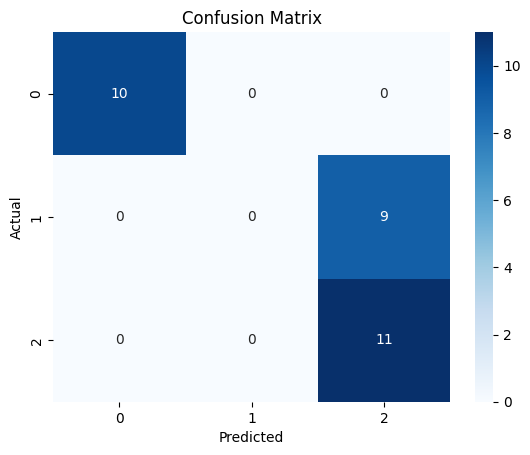

In [10]:
# Heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_n, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

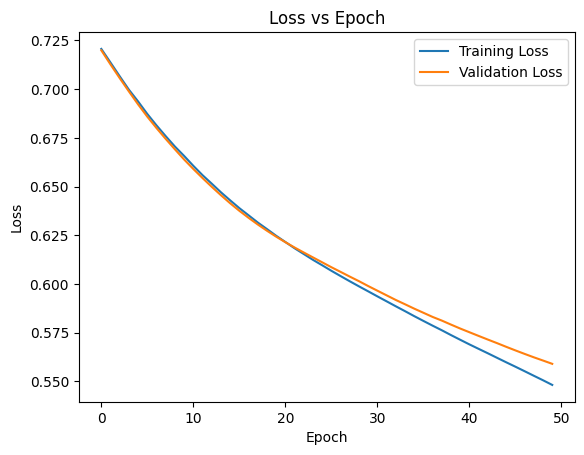

In [11]:
# Plotting the training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.savefig('loss_vs_epoch.png')
plt.show()

## Logging with Weights and Biases

**Logging the following details:**
- Model architecture: Number of layers, neurons, activation functions.
- Hyperparameters: Learning rate, batch size, number of epochs.
- Training and validation loss per epoch.
- Final evaluation metrics.
- Confusion matrix and loss curve visualizations.

In [12]:
# Logging using weights and biases
import wandb

# Take key from API.txt
with open('API.txt', 'r') as file:
    api_key = file.read()
wandb.login(key=api_key)

FileNotFoundError: [Errno 2] No such file or directory: 'API.txt'

In [ ]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ^C


In [ ]:
# Logging the model to Weights & Biases

# Initialize Weights & Biases with the project name "Asgn6"
wandb.init(project="Asgn6")  # Starts a new WandB run for project Asgn6

# Prepare and log model architecture details
model_config = {
    "num_layers": len(model.layers),  # Count the number of layers in the model
    "layers": [layer.__class__.__name__ for layer in model.layers],  # List of layer class names
    "neurons": [layer.units if hasattr(layer, 'units') else None for layer in model.layers],  # Neuron count per layer if available
    "activations": [layer.activation.__name__ for layer in model.layers if hasattr(layer, 'activation')],  # Activation functions of layers, if defined
}
wandb.config.update(model_config)  # Update WandB config with the model architecture details

# Prepare and log hyperparameters used during training
hyperparams = {
    "learning_rate": model.optimizer.learning_rate.numpy(),  # Extract learning rate from the optimizer
    "batch_size": batch_size,  # Use the globally defined batch_size variable
    "epochs": epochs,  # Use the globally defined epochs variable
}
wandb.config.update(hyperparams)  # Update WandB config with hyperparameter details

# Prepare and log the training and validation loss for each epoch from the history object
history_data = {
    "epoch": list(range(1, len(history.history['loss']) + 1)),  # Create a list of epoch numbers starting at 1
    "train_loss": history.history["loss"],  # Extract the training loss per epoch
    "val_loss": history.history["val_loss"]  # Extract the validation loss per epoch
}
# Log the losses for each epoch individually
for epoch, train_loss, val_loss in zip(*history_data.values()):
    wandb.log({"epoch": epoch, "train_loss": train_loss, "val_loss": val_loss})  # Log the current epoch's training and validation loss

# Log final evaluation metrics after model evaluation
wandb.log({
    "accuracy": float(accuracy),  # Log accuracy as a float
    "precision": float(precision),  # Log precision as a float
    "recall": float(recall),  # Log recall as a float
    "f1_score": float(f1)  # Log F1 score as a float
})

# Log the pre-generated confusion matrix image file to WandB
wandb.log({"confusion_matrix": wandb.Image("confusion_matrix.png")})  # Log the confusion matrix image

# Log the pre-generated loss curve (loss vs epoch) image file to WandB
wandb.log({"loss_curve": wandb.Image("loss_vs_epoch.png")})  # Log the loss curve image

# Finish the WandB logging session
wandb.finish()  # End the WandB run

accuracy,▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
f1_score,▁
precision,▁
recall,▁
train_loss,██▇▇▇▆▆▆▆▆▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
val_loss,██▇▇▇▆▆▆▆▆▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁
accuracy,0.63333
epoch,50
f1_score,0.59911
precision,0.64792


### **Screenshots:**

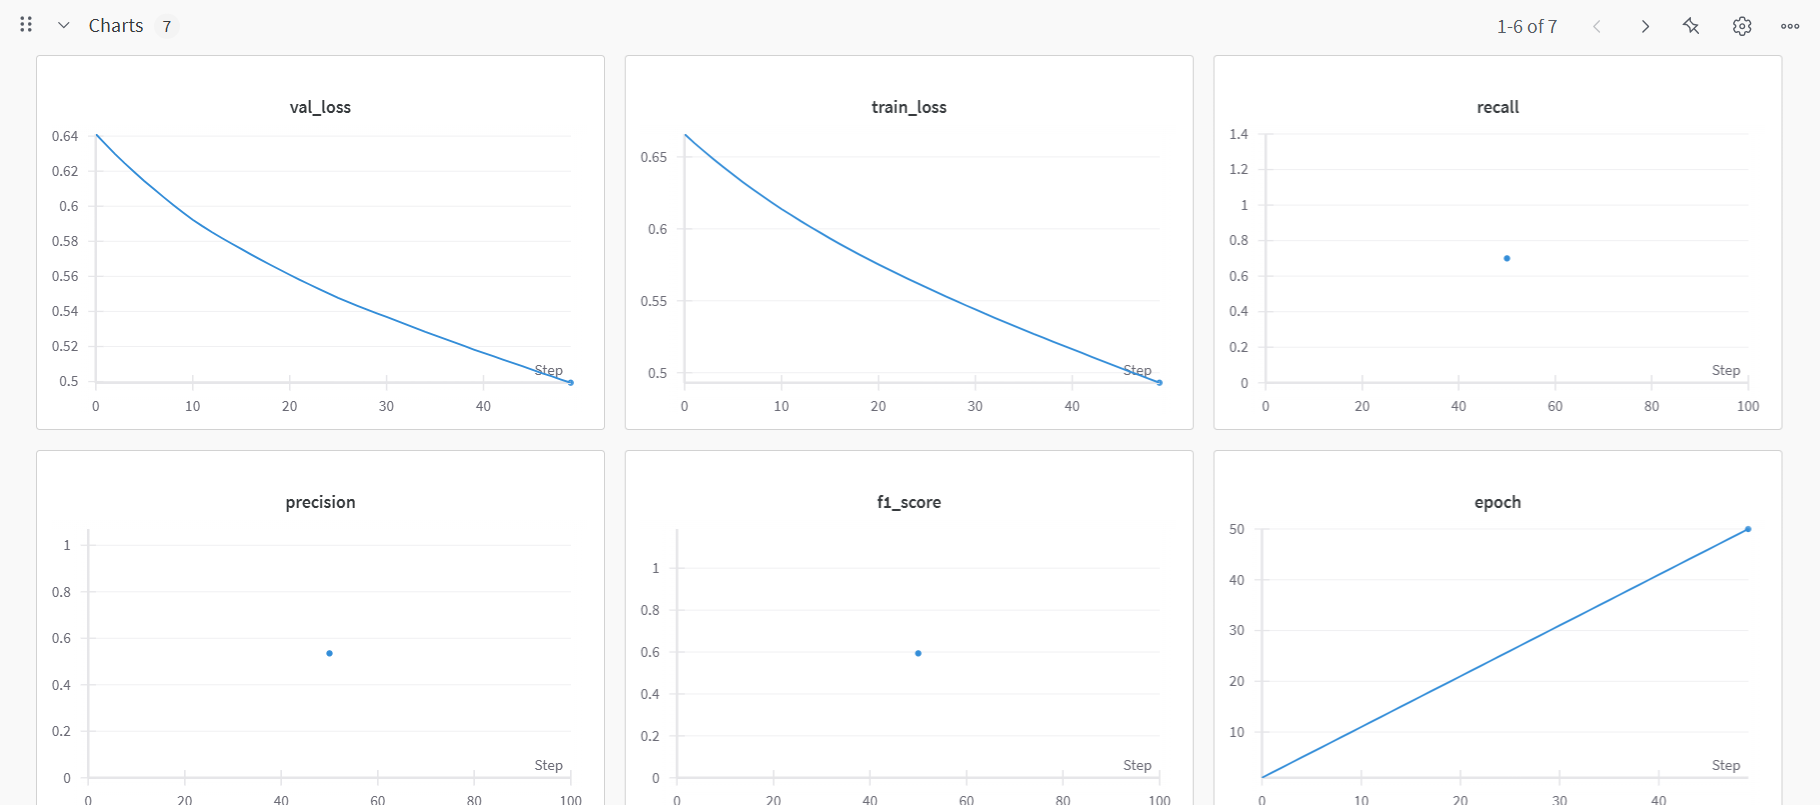

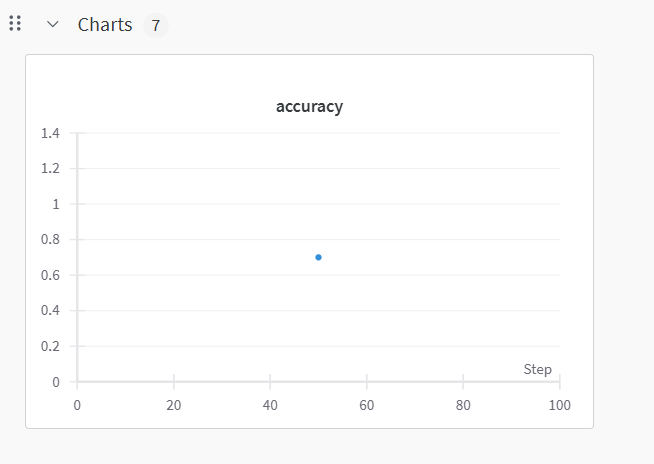

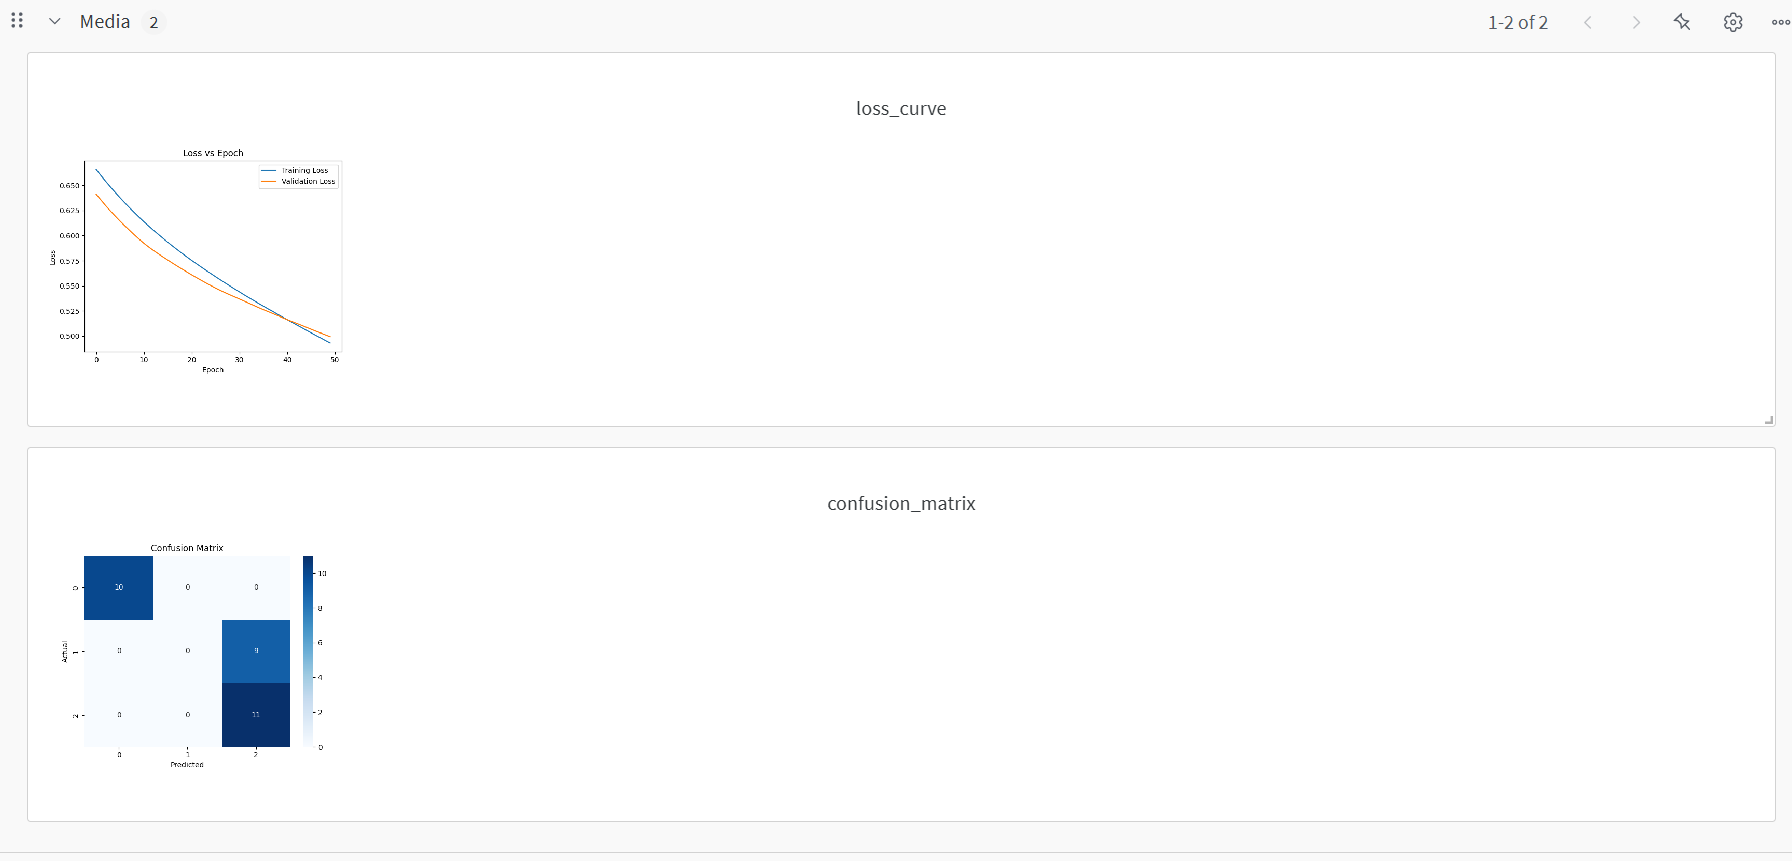

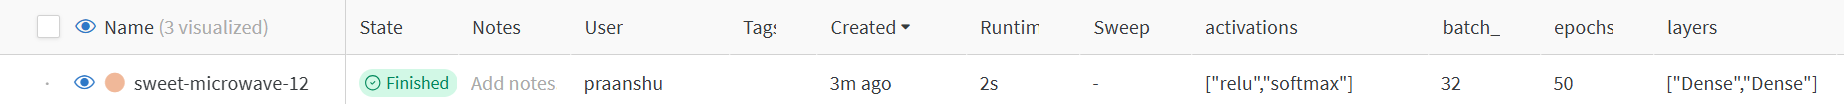

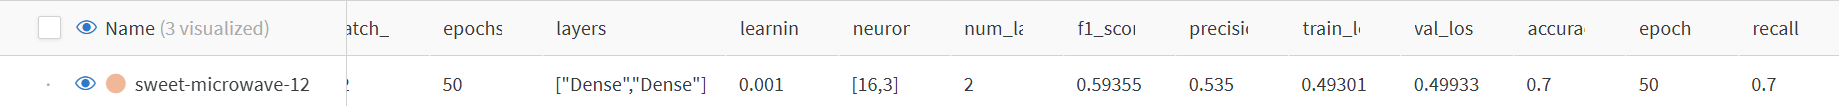

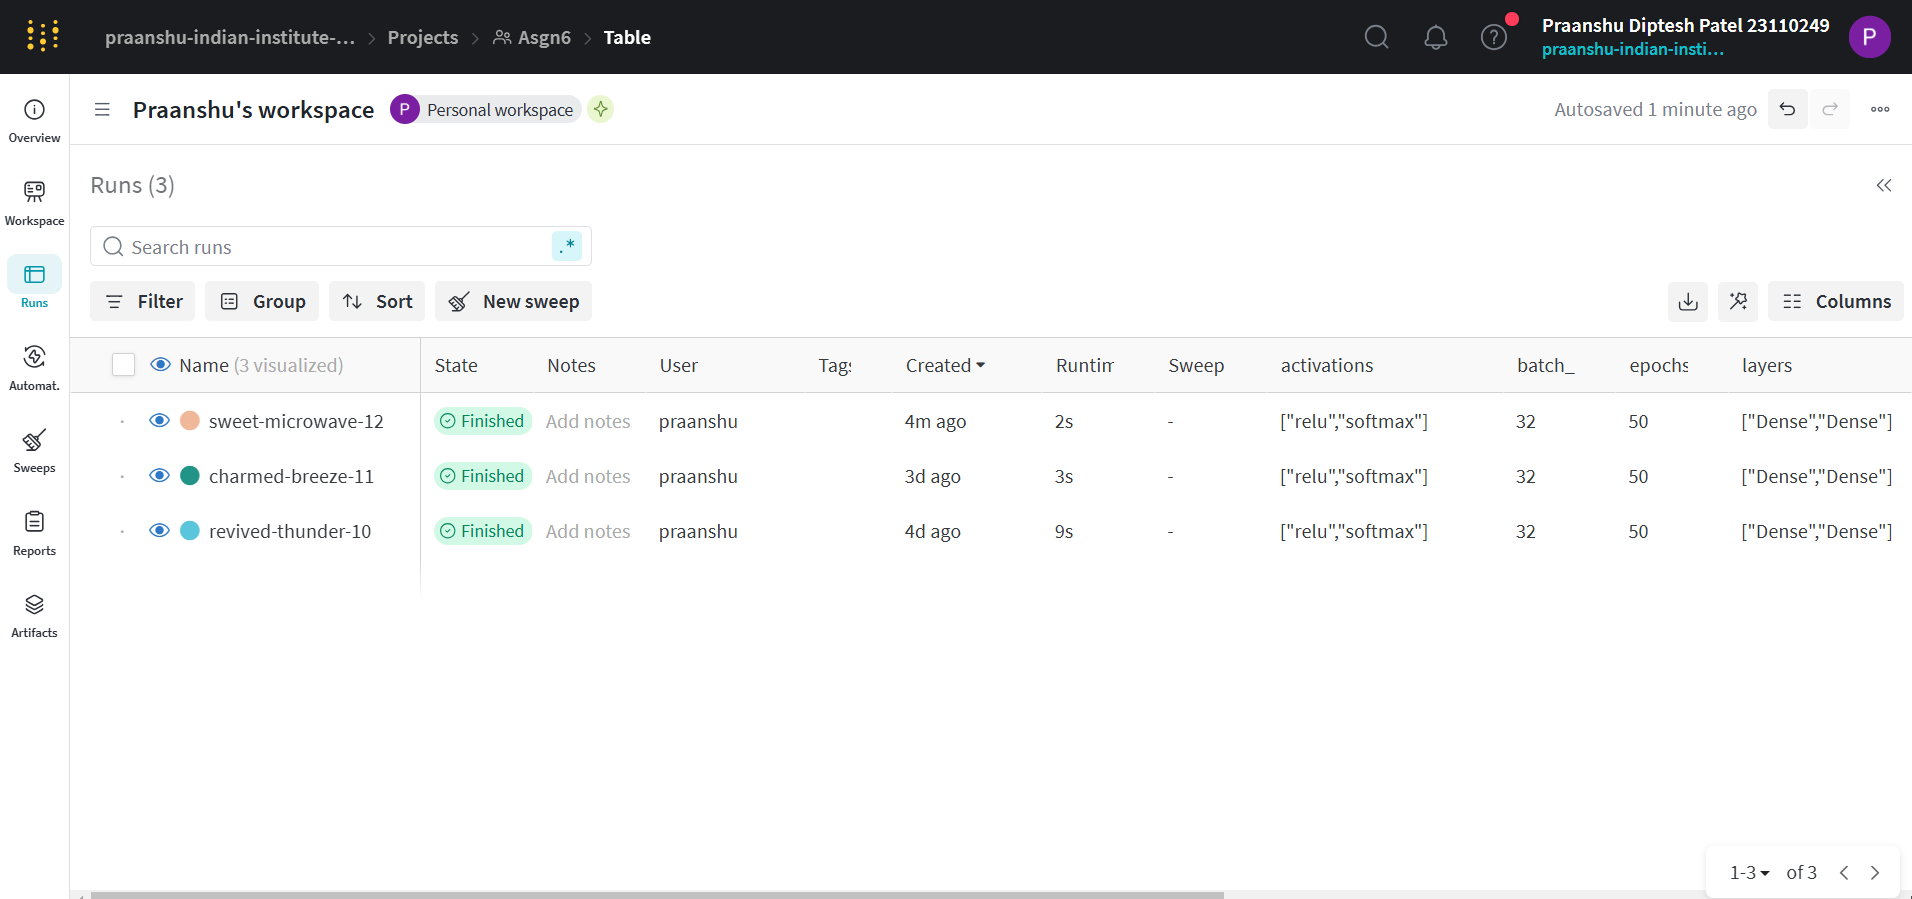

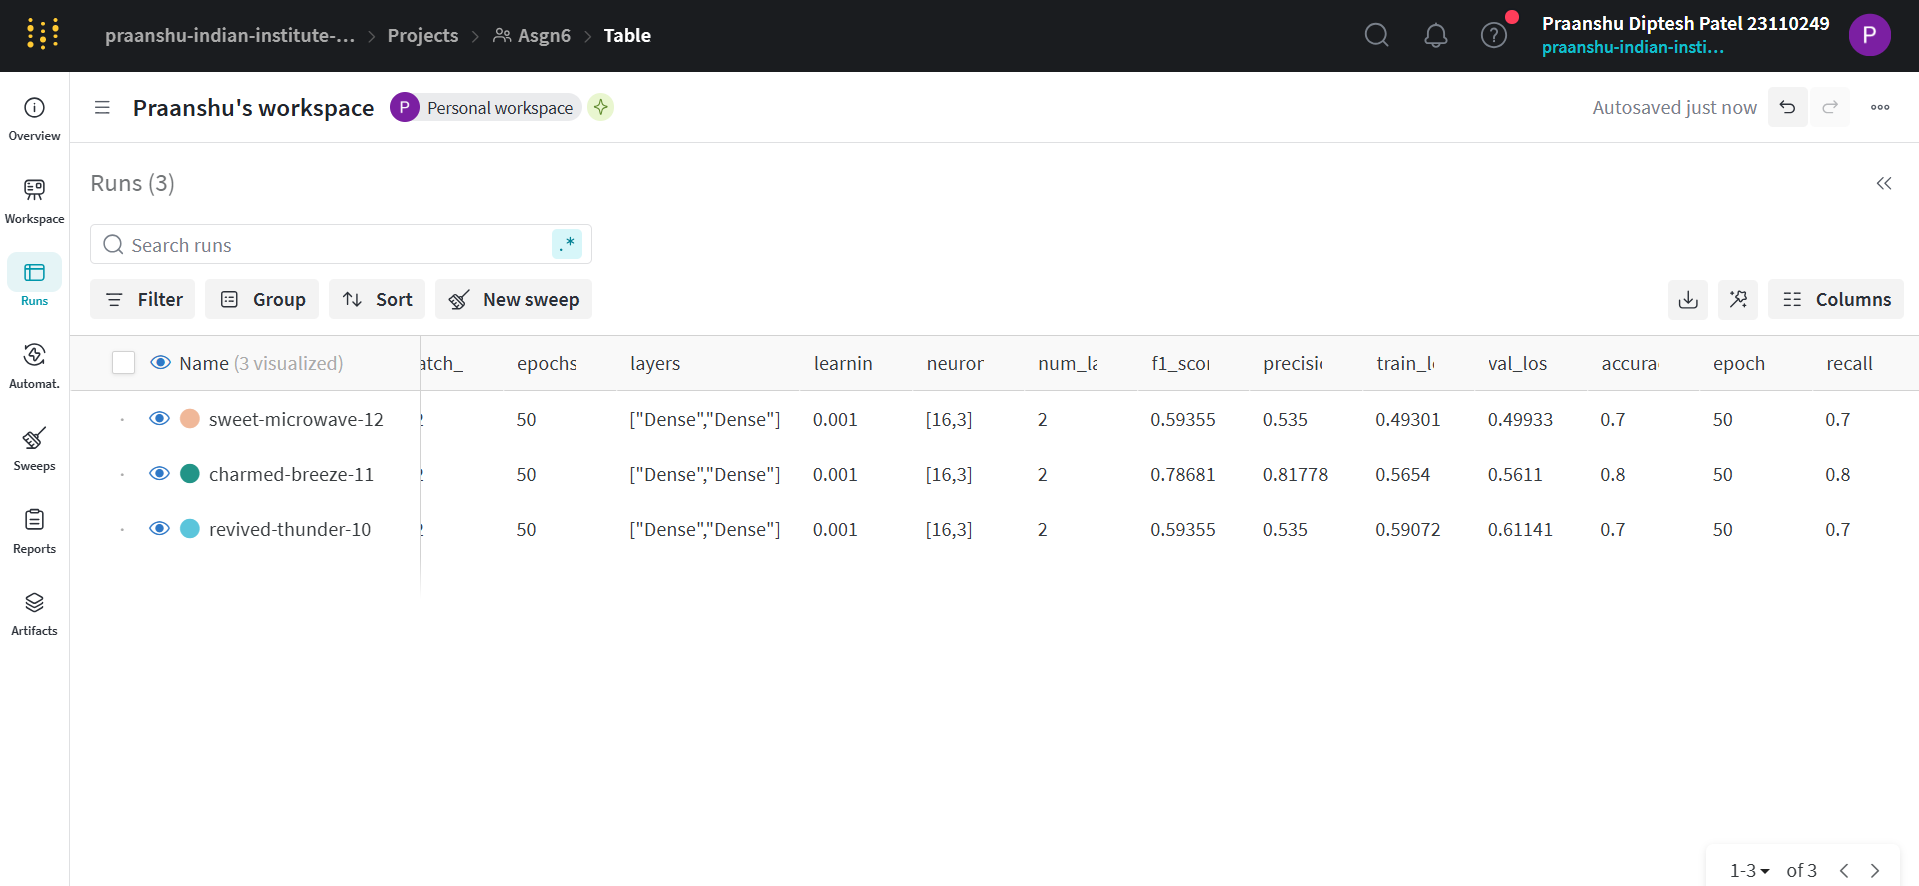

# Task 2


## Grid Search

In [ ]:
# Define parameters for grid search
param = {
    'batch_size': [2, 4],
    'learning_rate': [0.001, 1e-5],
    'epochs': [1, 3, 5]
}

config_list_grid = []
results = []
for batch_size in param['batch_size']:
    for learning_rate in param['learning_rate']:
        for epochs in param['epochs']:
            print(f"\nTraining model with batch_size: {batch_size}, learning_rate: {learning_rate}, epochs: {epochs}")
            keras.backend.clear_session() # Clearing any existing model in memory

            # Defining the MLP model
            model = Sequential()
            model.add(Dense(16, input_dim=4, activation='relu'))
            model.add(Dense(3, activation='softmax'))

            # Compiling the model
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.BinaryCrossentropy())

            # Training the model
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                              verbose=1, validation_split=0.1)
            
            # Evaluating the model
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_test_classes = np.argmax(y_test, axis=1)

            # Calculate metrics
            accuracy = accuracy_score(y_test_classes, y_pred_classes)
            f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
            config_list_grid.append((batch_size, learning_rate, epochs))
            
            # Store results
            results.append({
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'epochs': epochs,
                'accuracy': accuracy,
                'f1': f1
            })

            # Storing the training and validation losses with par
            results[-1]['train_loss'] = history.history['loss']
            results[-1]['val_loss'] = history.history['val_loss']
            
            # store y_pred_classes and y_test_classes for confusion matrix
            results[-1]['y_pred_classes'] = y_pred_classes
            results[-1]['y_test_classes'] = y_test_classes
            

            # Show 5 sample predictions
            print("\nSample predictions:")
            print("Input Features | True Label | Predicted Label")
            print("-" * 50)
            for i in range(5):
                true_label = y_test_classes[i]
                pred_label = y_pred_classes[i]
                features = X_test[i]
                print(f"{features} | {true_label} | {pred_label}")
        
            # Print accuracy and F1 score
            print("For batch_size: {}, learning_rate: {}, epochs: {}".format(batch_size, learning_rate, epochs))
            print(f"\nAccuracy: {accuracy}")
            print(f"F1 Score: {f1}")



Training model with batch_size: 2, learning_rate: 0.001, epochs: 1
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6625 - val_loss: 0.6477
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 2, learning_rate: 0.001, epochs: 1

Accuracy: 0.5666666666666667
F1 Score: 0.5634085213032581

Training model with batch_size: 2, learning_rate: 0.001, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7415 - val_loss: 0.6863
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.6831 - val_loss: 0.6399
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.6401 - val_loss: 0.6047
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 2, learning_rate: 0.001, epochs: 3

Accuracy: 0.6666666666666666
F1 Score: 0.5678728070175438

Training model with batch_size: 2, learning_rate: 0.001, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7034 - val_loss: 0.6675
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.6507 - val_loss: 0.6310
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.6173 - val_loss: 0.6043
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.5914 - val_loss: 0.5796
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.5601 - val_loss: 0.5576
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 2, learning_rate: 0.001, epochs: 5

Accuracy: 0.6666666666666666
F1 Score: 0.5873015873015873

Training model with batch_size: 2, learning_rate: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6675 - val_loss: 0.6548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 2, learning_rate: 1e-05, epochs: 1

Accuracy: 0.36666666666666664
F1 Score: 0.1967479674796748

Training model with batch_size: 2, learning_rate: 1e-05, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7203 - val_loss: 0.6891
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.7141 - val_loss: 0.6885
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.7131 - val_loss: 0.6880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 1
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 2, learning_rate: 1e-05, epochs: 3

Accuracy: 0.3
F1 Score: 0.13846153846153847

Training model with batch_size: 2, learning_rate: 1e-05, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6784 - val_loss: 0.6719
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.6847 - val_loss: 0.6715
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.6759 - val_loss: 0.6711
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.6771 - val_loss: 0.6707
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.6789 - val_loss: 0.6703
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 0
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 2, learning_rate: 1e-05, epochs: 5

Accuracy: 0.16666666666666666
F1 Score: 0.10784313725490197

Training model with batch_size: 4, learning_rate

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6962 - val_loss: 0.6615
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 1
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 4, learning_rate: 0.001, epochs: 1

Accuracy: 0.3
F1 Score: 0.14594594594594595

Training model with batch_size: 4, learning_rate: 0.001, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6752 - val_loss: 0.6585
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6601 - val_loss: 0.6460
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6451 - val_loss: 0.6338
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 4, learning_rate: 0.001, epochs: 3

Accuracy: 0.7333333333333333
F1 Score: 0.6622222222222223

Training model with batch_size: 4, learning_rate: 0.001, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6739 - val_loss: 0.6422
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6386 - val_loss: 0.6240
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6197 - val_loss: 0.6064
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6027 - val_loss: 0.5910
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5860 - val_loss: 0.5770
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 1
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2
For batch_size: 4, learning_rate: 0.001, epochs: 5

Accuracy: 0.6666666666666666
F1 Score: 0.5760045274476513

Training model with batch_size: 4, learning_rate: 1e-05, e

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6847 - val_loss: 0.6738
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 1
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 4, learning_rate: 1e-05, epochs: 1

Accuracy: 0.3
F1 Score: 0.13846153846153847

Training model with batch_size: 4, learning_rate: 1e-05, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7610 - val_loss: 0.7599
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7499 - val_loss: 0.7595
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7375 - val_loss: 0.7591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 1
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 4, learning_rate: 1e-05, epochs: 3

Accuracy: 0.3
F1 Score: 0.13846153846153847

Training model with batch_size: 4, learning_rate: 1e-05, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6775 - val_loss: 0.6985
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6849 - val_loss: 0.6982
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6817 - val_loss: 0.6978
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6786 - val_loss: 0.6975
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6836 - val_loss: 0.6971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 4, learning_rate: 1e-05, epochs: 5

Accuracy: 0.6
F1 Score: 0.4697777777777778


Plotting Loss vs epochs for each combination of hyperparameters.

For batch_size:  2 , learning_rate:  0.001 , epochs:  1
Loss:  [0.6514067649841309]
Validation Loss:  [0.6477406620979309]


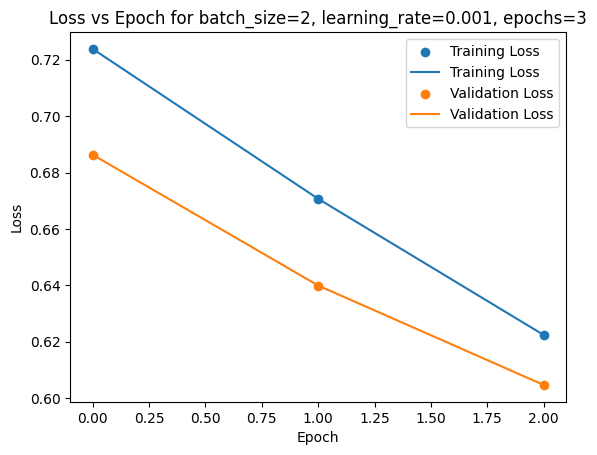

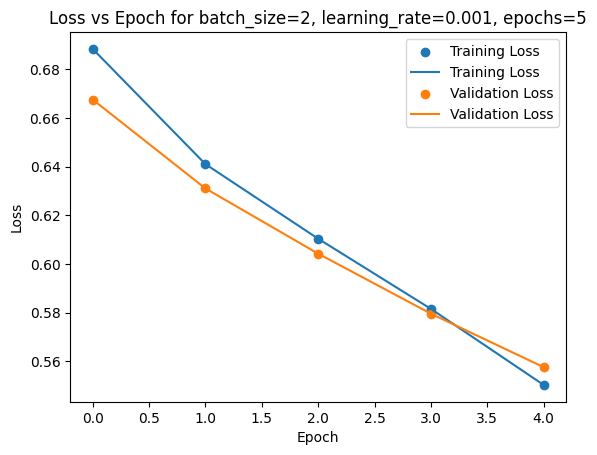

For batch_size:  2 , learning_rate:  1e-05 , epochs:  1
Loss:  [0.6574719548225403]
Validation Loss:  [0.6547726392745972]


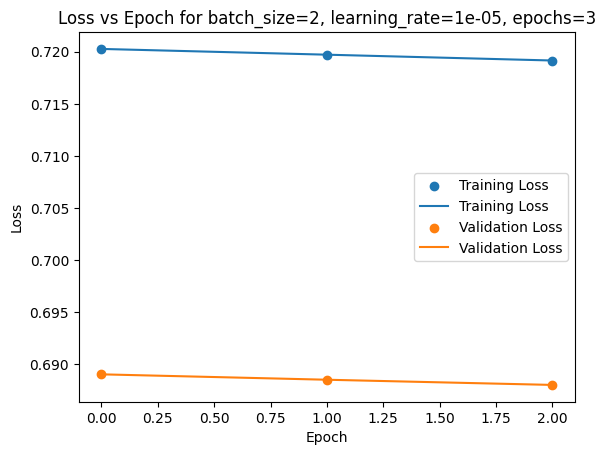

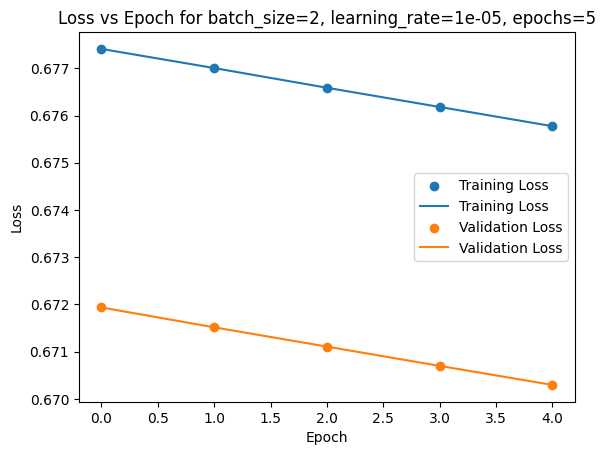

For batch_size:  4 , learning_rate:  0.001 , epochs:  1
Loss:  [0.6838313341140747]
Validation Loss:  [0.6614900231361389]


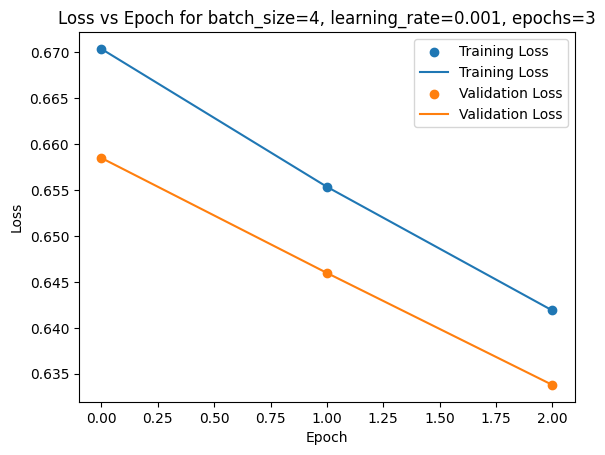

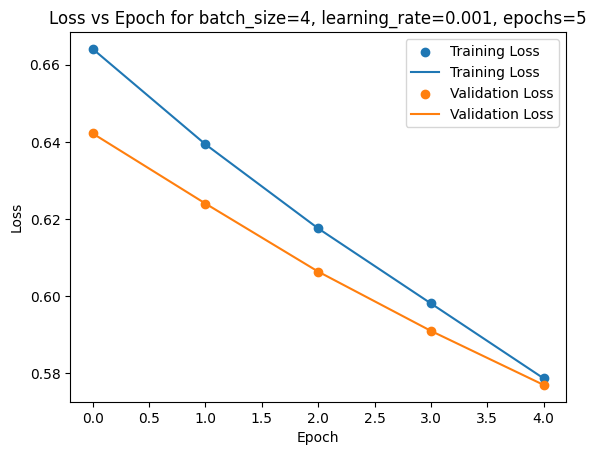

For batch_size:  4 , learning_rate:  1e-05 , epochs:  1
Loss:  [0.6796062588691711]
Validation Loss:  [0.6737917065620422]


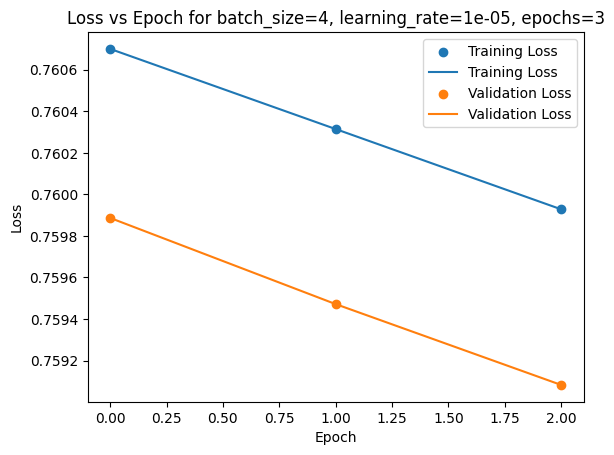

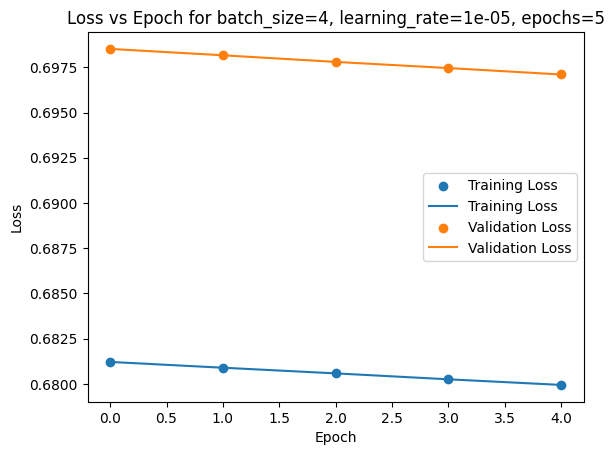

In [ ]:
# Plotting seprate the training and validation losses for all hyperparameter combinations
for result in results:
    if result['epochs'] == 1: # Printing instead of plotting for epochs=1
        print("For batch_size: ",result['batch_size'],", learning_rate: ",result['learning_rate'],", epochs: ",result['epochs'])
        print("Loss: ",result['train_loss'])
        print("Validation Loss: ",result['val_loss'])
        continue

    plt.scatter(range(result['epochs']), result['train_loss'], label='Training Loss', marker='o')
    plt.plot(result['train_loss'], label='Training Loss')
    plt.scatter(range(result['epochs']), result['val_loss'], label='Validation Loss', marker='o')
    plt.plot(result['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Epoch for batch_size={result["batch_size"]}, learning_rate={result["learning_rate"]}, epochs={result["epochs"]}')
    plt.legend()
    plt.show()

Confusion matrix for all the combinations of hyperparameters.

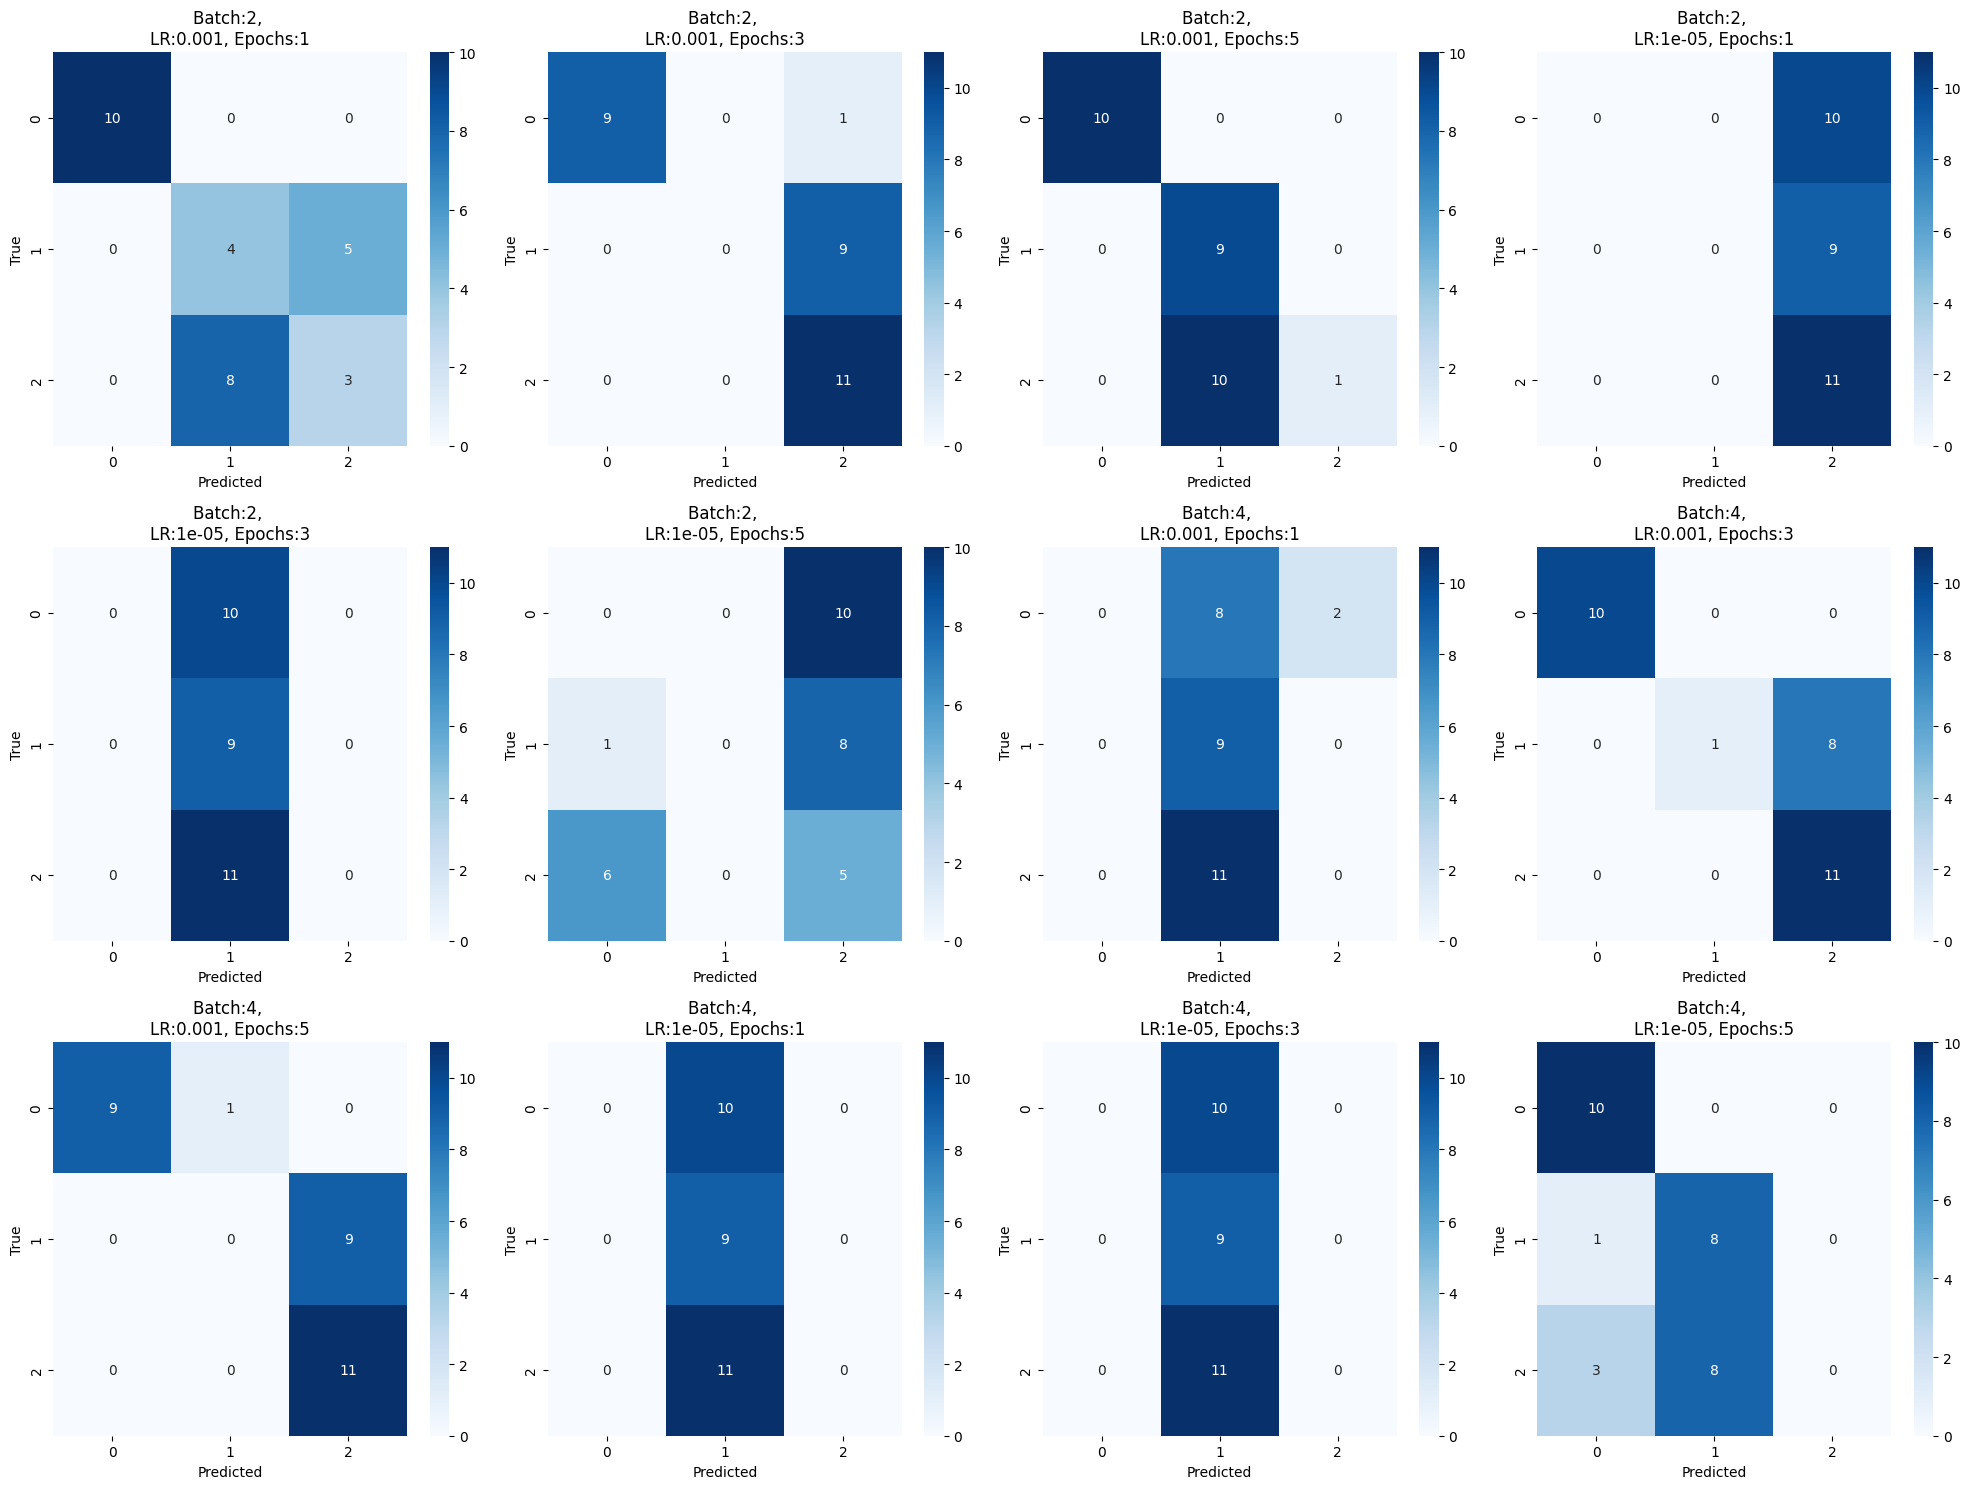

In [ ]:
# Plotting confusion matrix for all configurations
plt.figure(figsize=(20, 15))
for i, result in enumerate(results):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns to accommodate all 12 configurations
    cm = confusion_matrix(result['y_test_classes'], result['y_pred_classes'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Batch:{result["batch_size"]}, \nLR:{result["learning_rate"]}, Epochs:{result["epochs"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()

plt.show()

In [ ]:
# Finding the best configuration
best_result = max(results, key=lambda x: x['accuracy'])
print("\nBest configuration:")
print(f"Batch size: {best_result['batch_size']}")
print(f"Learning rate: {best_result['learning_rate']}")
print(f"Epochs: {best_result['epochs']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"F1 Score: {best_result['f1']:.4f}")


Best configuration:
Batch size: 4
Learning rate: 0.001
Epochs: 3
Accuracy: 0.7333
F1 Score: 0.6622


## Automated Hyperparameter Search

Doing random search for hyperparameters.

In [ ]:
import autogluon.common as ag
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd

# importing the iris dataset with pd as required by AutoGluon
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Split with stratification (70% train, 20% test, 10% holdout for bagging)

train, test = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=42)

# Convert to AutoGluon datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)

# Configure neural network search space
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Categorical(1,3, 5),
        'learning_rate': ag.space.Categorical(1e-3, 1e-5),
        'batch_size': ag.space.Categorical(2, 4),
        'num_layers': 1,  # Number of hidden layers
        'hidden_size': 16,  # Neurons in hidden layer
        'activation': 'relu'
    }
}

# Initialize predictor with bagged mode configuration
predictor = TabularPredictor(label='target', problem_type='multiclass', eval_metric='accuracy',path = 'agModels-predictClass').fit(
    train_data=train_data,
    hyperparameters=nn_hyperparameters,
    hyperparameter_tune_kwargs={
        'num_trials': 10,
        'scheduler': 'local',
        'searcher': 'random' # Random search
    },
    time_limit=600 # Maximum time to spend on tuning
)



Fitted model: NeuralNetTorch/26f80_00000 ...
	0.5417	 = Validation score   (accuracy)
	3.77s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/26f80_00001 ...
	0.625	 = Validation score   (accuracy)
	3.8s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/26f80_00002 ...
	0.7083	 = Validation score   (accuracy)
	3.86s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/26f80_00003 ...
	0.2917	 = Validation score   (accuracy)
	3.79s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/26f80_00004 ...
	0.0417	 = Validation score   (accuracy)
	3.8s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/26f80_00005 ...
	0.6667	 = Validation score   (accuracy)
	3.9s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/26f80_00006 ...
	0.0	 = Validation score   (accuracy)
	3.79s	 = Training   runtime
	0.01s	 = Validation runtime


Test Accuracy: 0.6667
Test F1: 0.5368


Printing and storing information of hyperparamters accurary and F1 score for each combination of hyperparameters.

In [ ]:
import pickle # for opening pk file
import os

# Extract model information for comparison
compared_models_random = []
# Create a table to store the configuration and performance metrics
config_table = []
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:
        # We'll use the model's predictions and performance metrics
        model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])
        f1 = f1_score(y_test, model_preds, average='weighted')
        
        # Create entry with available information
        config_table.append({
            'Model': model_row['model'],
            'Accuracy': model_row['score_test'],
            'F1': f1
        })
        
        # Extract just the model ID from the string
        try:
            model_id = model_row['model'].split('/')[-1]
            model_path = f'agModels-predictClass/models/{model_row["model"]}/model.pkl'
            
            if os.path.exists(model_path):
                with open(model_path, 'rb') as file:
                    model = pickle.load(file)
                    print(f"Model: {model_row['model']}")
                    print(f"Learning rate: {model.params['learning_rate']}")
                    print(f"Batch size: {model.params['batch_size']}")
                    # Store model for comparison all the paramter as tupple with model name in dict
                    if hasattr(model, 'params'):
                        model_params = {}
                        model_params['model_name'] = model_row['model']
                        model_params['num_epochs'] = model.params.get('num_epochs', None)
                        model_params['learning_rate'] = model.params.get('learning_rate', None)
                        model_params['batch_size'] = model.params.get('batch_size', None)
                        model_params['Accuracy'] = model_row['score_test']
                        model_params['F1'] = f1
                        config_table[-1].update(model_params)
                    compared_models_random.append(model_params)
                    
            else:
                print(f"Model file not found for {model_row['model']}")
        except Exception as e:
            print(f"Error accessing model info: {e}")

# Display the configuration table
config_df = pd.DataFrame(config_table)
print("\nConfiguration Performance Table:")
print(config_df[['Model', 'Accuracy', 'F1']])

Model: NeuralNetTorch/26f80_00005
Learning rate: 0.001
Batch size: 2
Model: NeuralNetTorch/26f80_00002
Learning rate: 0.001
Batch size: 2
Model: NeuralNetTorch/26f80_00009
Learning rate: 0.001
Batch size: 4
Model: NeuralNetTorch/26f80_00001
Learning rate: 0.001
Batch size: 4
Model: NeuralNetTorch/26f80_00000
Learning rate: 0.001
Batch size: 2
Model: NeuralNetTorch/26f80_00007
Learning rate: 0.001
Batch size: 4
Model: NeuralNetTorch/26f80_00003
Learning rate: 0.001
Batch size: 2
Model: NeuralNetTorch/26f80_00006
Learning rate: 1e-05
Batch size: 4
Model: NeuralNetTorch/26f80_00004
Learning rate: 1e-05
Batch size: 2
Model: NeuralNetTorch/26f80_00008
Learning rate: 1e-05
Batch size: 2

Configuration Performance Table:
                        Model  Accuracy        F1
0  NeuralNetTorch/26f80_00005  0.666667  0.536769
1  NeuralNetTorch/26f80_00002  0.666667  0.536769
2  NeuralNetTorch/26f80_00009  0.666667  0.536769
3  NeuralNetTorch/26f80_00001  0.666667  0.536769
4  NeuralNetTorch/26f80_00

Doing hyperband search for hyperparameters.

In [ ]:
# Configure neural network search space
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Categorical(1,3, 5),
        'learning_rate': ag.space.Categorical(1e-3, 1e-5),
        'batch_size': ag.space.Categorical(2, 4),
        'num_layers': 1,  # Number of hidden layers
        'hidden_size': 16,  # Neurons in hidden layer
        'activation': 'relu'
    }
}

# Initialize predictor with bagged mode configuration
predictor = TabularPredictor(label='target', problem_type='multiclass',path = 'agModels-predictClass', eval_metric='accuracy').fit(
    train_data=train_data,
    hyperparameters=nn_hyperparameters,
    hyperparameter_tune_kwargs={
        'num_trials': 10,
        'scheduler': 'local',
        'searcher': 'bayes', # Hyperband-bayes search
       
    },
    time_limit=600 # Maximum time to spend on tuning
)

# Evaluate performance on test data
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Get leaderboard and create clean configuration table
leaderboard = predictor.leaderboard(test_data)

Fitted model: NeuralNetTorch/7b955f6a ...
	0.5417	 = Validation score   (accuracy)
	1.25s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/087656f2 ...
	0.3333	 = Validation score   (accuracy)
	1.08s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/773e6652 ...
	0.5	 = Validation score   (accuracy)
	1.17s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/2660c832 ...
	0.0	 = Validation score   (accuracy)
	1.07s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/adc10986 ...
	0.0417	 = Validation score   (accuracy)
	1.1s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/2976f448 ...
	0.0	 = Validation score   (accuracy)
	1.14s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/dcb6b815 ...
	0.0417	 = Validation score   (accuracy)
	1.29s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/1

Test Accuracy: 0.6667
Test F1: 0.5368


Printing accurary and F1 score for each combination of hyperparameters.

In [ ]:
compared_models_bays = []
config_table = []
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:
        # We'll use the model's predictions and performance metrics
        model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])
        f1 = f1_score(y_test, model_preds, average='weighted')
        
        # Create entry with available information
        config_table.append({
            'Model': model_row['model'],
            'Accuracy': model_row['score_test'],
            'F1': f1
        })
        
        # Extract just the model ID from the string
        try:
            model_id = model_row['model'].split('/')[-1]
            model_path = f'agModels-predictClass/models/{model_row["model"]}/model.pkl'
            
            if os.path.exists(model_path):
                with open(model_path, 'rb') as file:
                    model = pickle.load(file)
                    print(f"Model: {model_row['model']}")
                    print(f"Learning rate: {model.params['learning_rate']}")
                    print(f"Batch size: {model.params['batch_size']}")
                    # Store model for comparison all the paramter as tupple with model name in dict
                    if hasattr(model, 'params'):
                        model_params = {}
                        model_params['model_name'] = model_row['model']
                        model_params['num_epochs'] = model.params.get('num_epochs', None)
                        model_params['learning_rate'] = model.params.get('learning_rate', None)
                        model_params['batch_size'] = model.params.get('batch_size', None)
                        model_params['Accuracy'] = model_row['score_test']
                        model_params['F1'] = f1
                        config_table[-1].update(model_params)
                    compared_models_bays.append(model_params)
                    
            else:
                print(f"Model file not found for {model_row['model']}")
        except Exception as e:
            print(f"Error accessing model info: {e}")

# Display the configuration table
config_df = pd.DataFrame(config_table)
print("\nConfiguration Performance Table:")
print(config_df[['Model', 'Accuracy', 'F1']])

Model: NeuralNetTorch/103af76c
Learning rate: 0.001
Batch size: 2
Model: NeuralNetTorch/7b955f6a
Learning rate: 0.001
Batch size: 2
Model: NeuralNetTorch/087656f2
Learning rate: 0.001
Batch size: 4
Model: NeuralNetTorch/773e6652
Learning rate: 0.001
Batch size: 4
Model: NeuralNetTorch/2976f448
Learning rate: 1e-05
Batch size: 4
Model: NeuralNetTorch/af6703dd
Learning rate: 1e-05
Batch size: 2
Model: NeuralNetTorch/a3e5bf31
Learning rate: 1e-05
Batch size: 4
Model: NeuralNetTorch/adc10986
Learning rate: 1e-05
Batch size: 2
Model: NeuralNetTorch/dcb6b815
Learning rate: 1e-05
Batch size: 2
Model: NeuralNetTorch/2660c832
Learning rate: 1e-05
Batch size: 4

Configuration Performance Table:
                     Model  Accuracy        F1
0  NeuralNetTorch/103af76c  0.666667  0.536769
1  NeuralNetTorch/7b955f6a  0.600000  0.490000
2  NeuralNetTorch/087656f2  0.366667  0.330159
3  NeuralNetTorch/773e6652  0.366667  0.310709
4  NeuralNetTorch/2976f448  0.066667  0.074074
5  NeuralNetTorch/af6703

Printing the accuracy and F1 score grid search.

In [ ]:
#printing grid search results using config_list_grid
print("Grid Search Results:")
# Create a formatted table for grid search results
print("Grid Search Results:")
print("{:<5} {:<15} {:<15} {:<10} {:<15} {:<15}".format(
    "No.", "Batch size", "Learning rate", "Epochs", "Accuracy", "F1 Score"))
print("-" * 75)

# Print the results in a formatted manner
for i, config in enumerate(config_list_grid):
    print("{:<5} {:<15} {:<15} {:<10} {:<15.4f} {:<15.4f}".format(
        i+1, config[0], config[1], config[2], 
        results[i]['accuracy'], results[i]['f1']))
    
# Print the best configuration
best_idx = max(range(len(results)), key=lambda i: results[i]['accuracy'])
best_config = config_list_grid[best_idx]
print("\nBest Configuration:")
print(f"Batch size: {best_config[0]}")
print(f"Learning rate: {best_config[1]}")
print(f"Epochs: {best_config[2]}")
print(f"Accuracy: {results[best_idx]['accuracy']:.4f}")
print(f"F1 Score: {results[best_idx]['f1']:.4f}")

Grid Search Results:
Grid Search Results:
No.   Batch size      Learning rate   Epochs     Accuracy        F1 Score       
---------------------------------------------------------------------------
1     2               0.001           1          0.5667          0.5634         
2     2               0.001           3          0.6667          0.5679         
3     2               0.001           5          0.6667          0.5873         
4     2               1e-05           1          0.3667          0.1967         
5     2               1e-05           3          0.3000          0.1385         
6     2               1e-05           5          0.1667          0.1078         
7     4               0.001           1          0.3000          0.1459         
8     4               0.001           3          0.7333          0.6622         
9     4               0.001           5          0.6667          0.5760         
10    4               1e-05           1          0.3000          0.1385 

Comapring the results of grid search, random search and hyperband search.

In [ ]:

# Initialize an empty list to collect comparison data
comparison_data = []

# Add Grid Search results
for result in results:
    comparison_data.append({
        'search_method': 'Grid',
        'batch_size': result['batch_size'],
        'learning_rate': result['learning_rate'],
        'epochs': result['epochs'],
        'accuracy': result['accuracy'],
        'f1': result['f1']
    })

# Add Random Search results if available
if 'compared_models_random' in locals() and compared_models_random:
    for model in compared_models_random:
        if all(key in model for key in ['batch_size', 'learning_rate', 'num_epochs', 'Accuracy', 'F1']):
            comparison_data.append({
                'search_method': 'Random',
                'batch_size': model['batch_size'],
                'learning_rate': model['learning_rate'],
                'accuracy': model['Accuracy'],
                'epochs': model['num_epochs'],
                'f1': model['F1']
            })

# Add Hyperband (Bayesian) Search results if available
if 'compared_models_bays' in locals() and compared_models_bays:
    for model in compared_models_bays:
        if all(key in model for key in ['batch_size', 'learning_rate', 'num_epochs', 'Accuracy', 'F1']):
            comparison_data.append({
                'search_method': 'Hyperband',
                'batch_size': model['batch_size'],
                'learning_rate': model['learning_rate'],
                'accuracy': model['Accuracy'],
                'epochs': model['num_epochs'],
                'f1': model['F1']
            })

# Create a DataFrame from the collected data
comparison_df = pd.DataFrame(comparison_data)

# Create a pivot table with 'learning_rate' and 'batch_size' as the index.
# The pivot table will have separate columns for accuracy and F1 for each search method.
pivot_table = comparison_df.pivot_table(
    index=['learning_rate', 'batch_size','epochs'],
    columns='search_method',
    values=['accuracy', 'f1']
)

# Flatten the multi-level column index for clarity
pivot_table.columns = [f'{method}_{metric}' for metric, method in pivot_table.columns]
pivot_table.reset_index(inplace=True)

print("Side-by-Side Comparison of Grid, Hyperparameters and Search Methods:")
pivot_table


Side-by-Side Comparison of Grid, Hyperparameters and Search Methods:


,learning_rate,batch_size,epochs,Grid_accuracy,Hyperband_accuracy,Random_accuracy,Grid_f1,Hyperband_f1,Random_f1
0,0.00001,2,1,0.366667,0.066667,0.066667,0.196748,0.074074,0.074074
1,0.00001,2,3,0.300000,0.066667,NaN,0.138462,0.074074,NaN
2,0.00001,2,5,0.166667,NaN,NaN,0.107843,NaN,NaN
3,0.00001,4,1,0.300000,0.066667,NaN,0.138462,0.074074,NaN
4,0.00001,4,3,0.300000,NaN,0.066667,0.138462,NaN,0.078431
5,0.00001,4,5,0.600000,0.066667,NaN,0.469778,0.074074,NaN
6,0.00100,2,1,0.566667,0.600000,0.516667,0.563409,0.490000,0.439996
7,0.00100,2,3,0.666667,0.666667,NaN,0.567873,0.536769,NaN
8,0.00100,2,5,0.666667,NaN,0.666667,0.587302,NaN,0.536769
9,0.00100,4,1,0.300000,0.366667,NaN,0.145946,0.320434,NaN


**Relation between the hyperparameters and their impact on the performance:**

- **Epochs:** The performance of the model is directly proportional to the number of epochs. The model performs better with more epochs as it has more time to learn the patterns in the data. This is evident from the loss vs epochs plot for each combination of hyperparameters where the loss decreases with more epochs.

- **Batch Size:** The performance of the model is inversely proportional to the batch size. The model performs better with a smaller batch size as it updates the weights more frequently. This is evident from the loss values for each combination of hyperparameters where the loss is higher for larger batch sizes.

- **Learning Rate:** The performance of the model is directly proportional to the learning rate. The model performs better with a higher learning rate as it converges faster. This is evident from the loss values for each combination of hyperparameters where the loss is lower for higher learning rates.

**Comparison between manual tuning and automated search:**

Automated search is generally better for large and complex models, where manually tuning hyperparameters is time-consuming and inefficient. It systematically explores a wide range of possibilities, often leading to better results while saving time and effort.

Manual tuning can be useful when you have domain expertise and intuition about the problem. For small-scale models or when computational resources are limited, manual tuning may be a practical choice.

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.1.3

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

import autogluon
from autogluon.core.models import AbstractModel
from autogluon.features.generators import LabelEncoderFeatureGenerator
from autogluon.common import space
from autogluon.tabular import TabularPredictor
import autogluon.core.searcher as ag_searcher
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
class CustomNeuralNetworkClassifier(AbstractModel):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self._feature_generator = None
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set device

    def _preprocess(self, X: pd.DataFrame, is_train=False, **kwargs) -> np.ndarray:
        X = super()._preprocess(X, **kwargs)
        if is_train:
            self._feature_generator = LabelEncoderFeatureGenerator(verbosity=0)   # Encodes the labels to encoder format supported by AutoGluon
            self._feature_generator.fit(X=X)
        if self._feature_generator is not None and self._feature_generator.features_in:
            X = X.copy()
            X[self._feature_generator.features_in] = self._feature_generator.transform(X=X)
        return X.fillna(0).to_numpy(dtype=np.float32)

    def _fit(self, X: pd.DataFrame, y: pd.Series, **kwargs):
        X = self.preprocess(X, is_train=True)
        params = self._get_model_params()
        print(f"Hyperparameters: {params}")

        # Split data into train and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.13, random_state=42)   # Same splitting as done in task 1

        self.model = create_model()       # Get model
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=params.get('learning_rate', 0.001)),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

        X_train_tensor = np.array(X_train, dtype=np.float32)
        y_train_tensor = np.array(y_train.to_numpy(), dtype=np.int32)
        X_val_tensor = np.array(X_val, dtype=np.float32)
        y_val_tensor = np.array(y_val.to_numpy(), dtype=np.int32)

        epochs = params.get('epochs', 10)
        batch_size = params.get('batch_size', 32)

        train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor)).batch(batch_size).shuffle(len(X_train_tensor))

        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            running_loss = 0.0

            for batch_X, batch_y in train_dataset:
                with tf.GradientTape() as tape:
                    logits = self.model(batch_X, training=True)
                    loss = tf.keras.losses.sparse_categorical_crossentropy(batch_y, logits, from_logits=True)
                    loss = tf.reduce_mean(loss)
                gradients = tape.gradient(loss, self.model.trainable_variables)
                self.model.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
                running_loss += loss.numpy()

            avg_train_loss = running_loss / len(train_dataset)
            train_losses.append(avg_train_loss)

            val_outputs = self.model(X_val_tensor, training=False)
            val_loss = tf.keras.losses.sparse_categorical_crossentropy(y_val_tensor, val_outputs, from_logits=True)
            val_loss = tf.reduce_mean(val_loss).numpy()
            val_losses.append(val_loss)

            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Plot training vs validation loss
        plt.figure(figsize=(8, 6))
        plt.scatter(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
        plt.scatter(range(1, epochs + 1), val_losses, label='Validation Loss', color='red')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Training vs Validation Loss lr = {params.get("learning_rate", 0.001)}, batch_size = {batch_size}, epochs = {epochs}')
        plt.legend()
        plt.show()


    def _predict(self, X: pd.DataFrame, **kwargs):
        X = self.preprocess(X, is_train=False)
        X_array = np.array(X, dtype=np.float32)

        logits = self.model(X_array, training=False)
        predictions = np.argmax(logits, axis=1)

        return predictions


    def _predict_proba(self, X: pd.DataFrame, **kwargs):
        X = self.preprocess(X, is_train=False)
        X_array = np.array(X, dtype=np.float32)

        logits = self.model(X_array, training=False)
        probs = tf.nn.softmax(logits).numpy()  # Apply softmax to get probabilities

        return probs


    def _set_default_params(self):
        default_params = {
            'learning_rate': 0.001,
            'epochs': 10,
            'batch_size': 32
        }
        for param, val in default_params.items():
            self._set_default_param_value(param, val)

    def _get_default_auxiliary_params(self) -> dict:
        default_auxiliary_params = super()._get_default_auxiliary_params()
        extra_auxiliary_params = {'valid_raw_types': ['int', 'float', 'category']}
        default_auxiliary_params.update(extra_auxiliary_params)
        return default_auxiliary_params

In [ ]:
custom_hyperparameters = {
    CustomNeuralNetworkClassifier: {
        'batch_size': space.Categorical(2, 4),
        'learning_rate': space.Categorical(1e-3, 1e-5),
        'epochs': space.Categorical(1, 3, 5)
    }
}

In [ ]:
y_train_df = pd.DataFrame(np.ravel(y_train.argmax(axis=1)))
X_train_df = pd.DataFrame(X_train)
train_df = X_train_df.copy()
train_df['target'] = y_train_df

X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(np.ravel(y_test.argmax(axis=1)))
test_df = X_test_df.copy()
test_df['target'] = y_test_df

In [ ]:
grid_searcher_instance = ag_searcher.LocalGridSearcher(search_space=custom_hyperparameters[CustomNeuralNetworkClassifier])

grid_search_tune_kwargs = {
    "scheduler": "local",
    "searcher": grid_searcher_instance,
    "time_out": 200000
}

grid_predictor = TabularPredictor(label='target', path='my_models/grid_search', eval_metric='accuracy').fit(
    train_df,
    hyperparameters=custom_hyperparameters,
    hyperparameter_tune_kwargs=grid_search_tune_kwargs,
    time_limit=200,
    raise_on_no_models_fitted=False,
    verbosity=1
)

In [ ]:
random_searcher_instance = ag_searcher.LocalRandomSearcher(search_space=custom_hyperparameters[CustomNeuralNetworkClassifier])

random_search_tune_kwargs = {
    "scheduler": "local",
    "searcher": random_searcher_instance,
    "time_out": 200000
}

random_predictor = TabularPredictor(label='target', path='my_models/random_search', eval_metric='accuracy').fit(
    train_df,
    hyperparameters=custom_hyperparameters,
    hyperparameter_tune_kwargs=random_search_tune_kwargs,
    time_limit=200,
    raise_on_no_models_fitted=False
)

In [ ]:
hyperband_search_tune_kwargs = {
    "scheduler": "local",
    "searcher": random_searcher_instance,
    "search_strategy": "hyperband",
    "time_out": 200000
}

hyperband_predictor = TabularPredictor(label='target', path='my_models/hyperband', eval_metric='accuracy').fit(
    train_df,
    hyperparameters=custom_hyperparameters,
    hyperparameter_tune_kwargs=hyperband_search_tune_kwargs,
    time_limit=200,
    raise_on_no_models_fitted=False
)

In [ ]:
bayesian_search_tune_kwargs = {
    "scheduler": "local",
    "searcher": random_searcher_instance,
    "search_strategy": "bayesopt",
    "time_out": 200000
}

bayesian_predictor = TabularPredictor(label='target', path='my_models/bayesian', eval_metric='accuracy').fit(
    train_df,
    hyperparameters=custom_hyperparameters,
    hyperparameter_tune_kwargs=bayesian_search_tune_kwargs,
    time_limit=200,
    raise_on_no_models_fitted=False
)

In [ ]:
name_to_hyperparams = {
    "grid_search": {
        "CustomNeuralNetworkClassifier/T1": [1e-3, 1, 2],
        "CustomNeuralNetworkClassifier/T2": [1e-5, 1, 2],
        "CustomNeuralNetworkClassifier/T3": [1e-3, 3, 2],
        "CustomNeuralNetworkClassifier/T4": [1e-5, 3, 2],
        "CustomNeuralNetworkClassifier/T5": [1e-3, 5, 2],
        "CustomNeuralNetworkClassifier/T6": [1e-5, 5, 2],
        "CustomNeuralNetworkClassifier/T7": [1e-3, 1, 4],
        "CustomNeuralNetworkClassifier/T8": [1e-5, 1, 4],
        "CustomNeuralNetworkClassifier/T9": [1e-3, 3, 4],
        "CustomNeuralNetworkClassifier/T10": [1e-5, 3, 4],
        "CustomNeuralNetworkClassifier/T11": [1e-3, 5, 4],
        "CustomNeuralNetworkClassifier/T12": [1e-5, 5, 4]
    }, "random_search": {
            "CustomNeuralNetworkClassifier/T1" : [1e-3, 1, 2],
            "CustomNeuralNetworkClassifier/T2" : [1e-3, 1, 2],
            "CustomNeuralNetworkClassifier/T3" : [1e-5, 5, 2],
            "CustomNeuralNetworkClassifier/T4" : [1e-3, 3, 2],
            "CustomNeuralNetworkClassifier/T5" : [1e-5, 1, 2],
            "CustomNeuralNetworkClassifier/T6" : [1e-5, 3, 2],
            "CustomNeuralNetworkClassifier/T7" : [1e-5, 3, 4],
            "CustomNeuralNetworkClassifier/T8" : [1e-5, 5, 4],
            "CustomNeuralNetworkClassifier/T9" : [1e-3, 3, 4],
            "CustomNeuralNetworkClassifier/T10" :[1e-5, 1, 4],
            "CustomNeuralNetworkClassifier/T11" :[1e-3, 5, 2],
            "CustomNeuralNetworkClassifier/T12" :[1e-3, 5, 4]
    }, "hyperband_search": {
            "CustomNeuralNetworkClassifier/T1": [1e-3, 1, 2],
            "CustomNeuralNetworkClassifier/T2": [1e-3, 1, 4],
            "CustomNeuralNetworkClassifier/T3": [1e-5, 5, 2],
            "CustomNeuralNetworkClassifier/T4": [1e-3, 3, 2],
            "CustomNeuralNetworkClassifier/T5": [1e-5, 1, 2],
            "CustomNeuralNetworkClassifier/T6": [1e-5, 3, 2],
            "CustomNeuralNetworkClassifier/T7": [1e-5, 3, 4],
            "CustomNeuralNetworkClassifier/T8": [1e-5, 5, 4],
            "CustomNeuralNetworkClassifier/T9": [1e-3, 3, 4],
            "CustomNeuralNetworkClassifier/T10": [1e-5, 1, 4],
            "CustomNeuralNetworkClassifier/T11": [1e-3, 5, 2],
            "CustomNeuralNetworkClassifier/T12": [1e-3, 5, 4]
    }, "bayesian_search": {
            "CustomNeuralNetworkClassifier/T1": [1e-3, 1, 2],
            "CustomNeuralNetworkClassifier/T2": [1e-3, 1, 4],
            "CustomNeuralNetworkClassifier/T3": [1e-5, 5, 2],
            "CustomNeuralNetworkClassifier/T4": [1e-3, 3, 2],
            "CustomNeuralNetworkClassifier/T5": [1e-5, 1, 2],
            "CustomNeuralNetworkClassifier/T6": [1e-5, 3, 2],
            "CustomNeuralNetworkClassifier/T7": [1e-5, 3, 4],
            "CustomNeuralNetworkClassifier/T8": [1e-5, 5, 4],
            "CustomNeuralNetworkClassifier/T9": [1e-3, 3, 4],
            "CustomNeuralNetworkClassifier/T10": [1e-5, 1, 4],
            "CustomNeuralNetworkClassifier/T11": [1e-3, 5, 2],
            "CustomNeuralNetworkClassifier/T12": [1e-3, 5, 4]
    }
}


In [ ]:
df_data = []
search_strategies = {"grid_search":grid_predictor, "random_search":random_predictor, "hyperband_search":hyperband_predictor, "bayesian_search":bayesian_predictor}
for search_strategy in list(search_strategies.keys()):
    predictor = search_strategies[search_strategy]
    for model in predictor.model_names():
        hparams = name_to_hyperparams[search_strategy].get(model, ["na", "na", "na"])
        predictions = predictor.predict(test_df, model=model)
        true_labels = test_df['target']
        acc = accuracy_score(true_labels, predictions)
        f1 = f1_score(true_labels, predictions, average='weighted')
        df_data.append({'model_name': model, 'lr': hparams[0], 'epochs': hparams[1], 'batch_size': hparams[2], 'strategy': search_strategy, 'accuracy': acc, 'f1-score': f1})


In [ ]:
df = pd.DataFrame(df_data)
df = df.sort_values(by=['strategy', 'accuracy'], ascending=[True, False])
df